# TITANIC

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Workflow:

1. Load Data
>- buka dataset

2. EDA (Exploratory Data Analysis)
>- pahami data sebelum melakukan modeling
>- lihat missing value, deskripsi statistic setiap feature, visualisasi

3. Preprocessing
>- handling outlier
>- balancing target jika datanya imbalance
>- imput missing value 
>- encoding feature categorical  

4. Splitting Data
>- define X dan y
>- split menjadi train set dan test set

5. Cari Model terbaik
>- pilih beberapa kandidat model 
>- lakukan cross validasi (bisa dengan Grid Search)
>- model dengan score terbaik dan paling stabil yang akan dipilih

6. Didapatkan Model terpilih (Model Benchmark)
>- misalnya, model terpilih adalah RandomForestClassifier
>- model ini belum diganti hyperparameternya
>- kita juga sudah punya score Model Benchmark

7. Feature selection
>- jika featurenya banyak, kita bisa memilih beberapa feature yang paling penting saja

8. Hyperparameter tuning pada model terpilih
>- mencari hyperparameter terbaik untuk model terpilih
>- kita punya score Model setelah Hyperparameter Tuning
>- bandingkan score Model Benchmark vs score Model setelah Hyperparameter Tuning
>- bisa jadi hyperparameter tuning meningkatkan performa model, bisa jadi tidak

9. Hasil akhir (predict pada test set)
>- predict ke test set

10. Jika performa model masih jelek, kembali ke tahap-tahap sebelumnya
>- bisa dengan mengganti metode di preprocessing
>- bisa dengan mengganti angka di hyperparameter
>- bisa dengan tambah atau kurangi feature yang digunakan
>- bisa dengan ganti model benchmark

# LOAD DATA

In [2]:
df = pd.read_csv('data/titanic2.csv')
df.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


In [3]:
df['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

# EDA

In [4]:
df.info()
# lihat missing value
# lihat dtype nya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


In [5]:
df.describe(include='all')
# perhatikan mean median min max unique dll

,sex,age,parch,fare,class,deck,embark_town,alive,alone
count,891,714.000000,891.000000,891.000000,891,203,889,891,891
unique,2,NaN,NaN,NaN,3,7,3,2,2
top,male,NaN,NaN,NaN,Third,C,Southampton,no,True
freq,577,NaN,NaN,NaN,491,59,644,549,537
mean,NaN,29.699118,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN
std,NaN,14.526497,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN
min,NaN,0.420000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,20.125000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN
50%,NaN,28.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN
75%,NaN,38.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='alive', ylabel='count'>

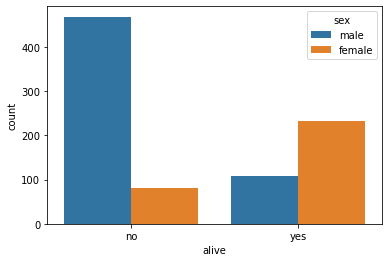

In [6]:
sns.countplot(x='alive',data=df,hue='sex')
# jumlah male lebih banyak
# tapi rasio yg selamat lebih baik pada female

<AxesSubplot:xlabel='class', ylabel='count'>

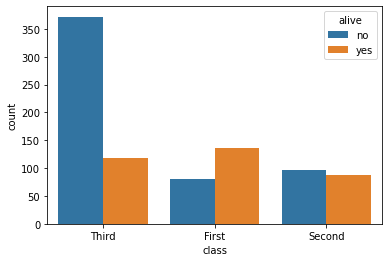

In [7]:
sns.countplot(x='class',data=df,hue='alive')
# penumpang third class paling banyak
# korban paling banyak juga dari third class
# rasio penumpang selamat pada first class lebih banyak daripada yg mati

<AxesSubplot:xlabel='fare', ylabel='class'>

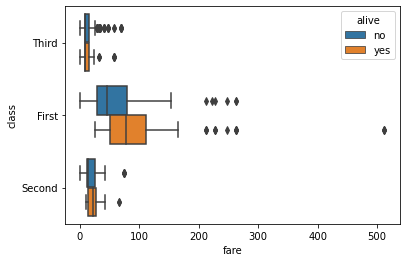

In [8]:
sns.boxplot(x='fare', y='class', hue='alive', data=df)

<AxesSubplot:xlabel='embark_town', ylabel='count'>

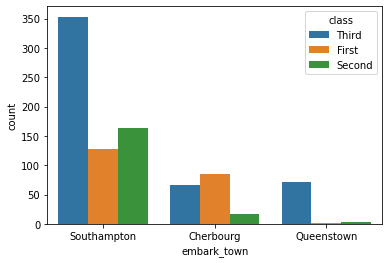

In [9]:
sns.countplot(x=df['embark_town'], data=df, hue='class')
# kebanyakan penumpang dari southampton, mungkin kota maju 
# paling dikit dari queenstown

<AxesSubplot:xlabel='embark_town,class'>

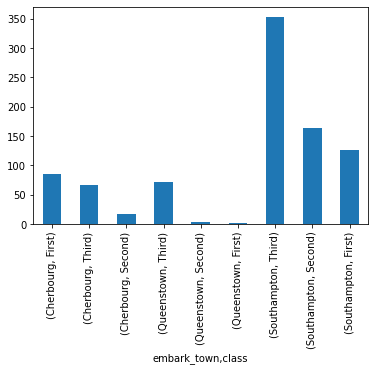

In [10]:
df.groupby('embark_town')['class'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='age', ylabel='alive'>

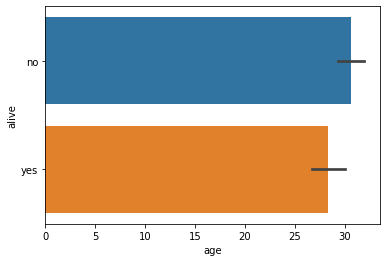

In [11]:
sns.barplot(x='age', y='alive', data=df)
# rata-rata yg hidup, berumur lebih muda sedikit dari yg mati 

C:\Users\62812\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\62812\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

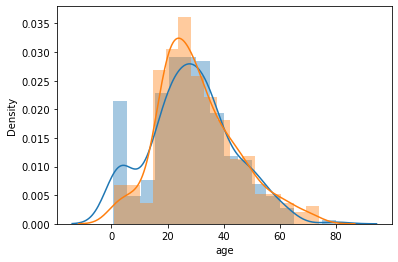

In [12]:
sns.distplot(df[df['alive']=='yes']['age']) # biru
sns.distplot(df[df['alive']=='no']['age']) # merah

# ada lonjakan jumlah selamat pada penumpang berusia anak2, 
# pada yg lanjut usia, ada sedikit kenaikan jumlah yg tidak selamat

<AxesSubplot:xlabel='alone', ylabel='count'>

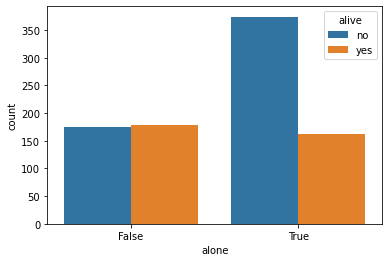

In [13]:
sns.countplot(x='alone', data=df, hue='alive')
# ketika alone(sendiri), ratio untuk selamat lebih rendah

Insight: 

Untuk orang yg naik titanic, jika ada kecelakaan, kemungkinan untuk selamat lebih besar jika anda wanita, muda, membayar mahal pada first class.

Selain EDA ini, bisa juga cek korelasi(terutama jika kasusnya regresi (targetnya continuous))

# Preprocessing

In [14]:
df = pd.read_csv('data/titanic2.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


In [16]:
df.isna().sum()/df.shape[0] # persentase missing value

sex            0.000000
age            0.198653
parch          0.000000
fare           0.000000
class          0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

Tahap Preprocessing:
- drop yg banyak missing value (deck)
- isi missing value (age, embark_town)
- ubah data type alone jadi string 
- encoding (ubah categorical jadi numerical): sex, class, embark_town, alone
- ubah data type target (alive) jadi numerical
- putuskan jenis encoding untuk tiap feature:
>- onehot: nominal dan ordinal, unique value categorynya dikit 
>- ordinal: ordinal, category jadi angka sesuai urutan yg kita tentukan
>- binary:  mengubah value jadi binary, jumlah column menyesuaikan digit binary

>- sex: onehot/binary
>- class: onehot/ordinal
>- embark_town: isi missing value (most_freq), lalu onehot/binary
>- alone: onehot/binary
>- age: isi missing value (median)

- kalau mau/perlu, bisa scaling (terutama KNN/Logreg)

In [17]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [18]:
df = pd.read_csv('data/titanic2.csv')

In [19]:
df = df.drop(columns='deck')
# deck terlalu banyak missing value

In [20]:
df['alone'] = df['alone'].astype(str)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   embark_town  889 non-null    object 
 6   alive        891 non-null    object 
 7   alone        891 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.8+ KB


In [22]:
# Encoding
onehot_fill = Pipeline([
    ('fillna', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first'))
])

transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first'), ['sex','class','alone']),
    ('onehot_fill', onehot_fill, ['embark_town']),
    ('fill age', SimpleImputer(strategy='median'), ['age'])
], remainder='passthrough')

# Splitting data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# define X dan y
X = df.drop(columns=['alive'])
y = [1 if i=='yes' else 0 for i in df['alive']]

In [25]:
# split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    stratify=y,
    random_state=2020
) 

In [26]:
X_test

,sex,age,parch,fare,class,embark_town,alone
560,male,NaN,0,7.7500,Third,Queenstown,True
130,male,33.0,0,7.8958,Third,Cherbourg,True
551,male,27.0,0,26.0000,Second,Southampton,True
587,male,60.0,1,79.2000,First,Cherbourg,False
2,female,26.0,0,7.9250,Third,Southampton,True
...,...,...,...,...,...,...,...
818,male,43.0,0,6.4500,Third,Southampton,True
113,female,20.0,0,9.8250,Third,Southampton,False
605,male,36.0,0,15.5500,Third,Southampton,False
642,female,2.0,2,27.9000,Third,Southampton,False


# Select Model Benchmark

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Kandidat model benchmark
models = [
    ['Log Regression', LogisticRegression()],
    ['KNN', KNeighborsClassifier()],
    ['Decision Tree', DecisionTreeClassifier(random_state=2020)],
    ['Random Forest', RandomForestClassifier(random_state=2020)]
]

In [29]:
# function untuk mencari model benchmark terbaik
def evaluate(models):
    model_name=[]
    f1_score=[]
    f1_std=[]

    for name, model in models:
        # model yg dijadikan pipeline, teridiri dari preprocessing dan model ML
        estimator = Pipeline([
            ('preprocess',transformer),
            ('model', model)
        ])
        
        # untuk cross validation
        skfold = StratifiedKFold(n_splits=5)

        model_name.append(name)
        
        # menyimpan rata2 f1 score  
        f1_score.append(cross_val_score(
            estimator, 
            X_train,y_train,
            cv=skfold,
            scoring='f1').mean()
            )

        # menyimpan standar deviasi f1 score  
        f1_std.append(cross_val_score(
            estimator, 
            X_train,y_train,
            cv=skfold,
            scoring='f1').std()
            )

    return pd.DataFrame({
        'model': model_name,
        'f1_score': f1_score,
        'f1_std': f1_std
    })

In [30]:
# membandingkan f1 score dari beberapa kandidat model
evaluate(models)

,model,f1_score,f1_std
0,Log Regression,0.723498,0.057850
1,KNN,0.577594,0.058171
2,Decision Tree,0.716155,0.013024
3,Random Forest,0.732327,0.049295


### Model terpilih: 
Random Forest, score tertinggi, std relatif rendah

- f1 score: 0.732
- st dev: 0.049

In [31]:
# Coba predict ke test set

# preproces dan model terpilih
estimator = Pipeline([
    ('preprocess',transformer),
    ('model', RandomForestClassifier(random_state=2020))
])

# fit
estimator.fit(X_train, y_train)

# f1_score (y_test, y_predict)
f1_score(y_test, estimator.predict(X_test))

0.7301587301587301

### F1 score (pada test set) dari model Random Forest adalah 0.73

\* hasilnya mungkin berubah-ubah karena ada randomisasi di suatu tempat

# Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [33]:
# untuk mengisi hyperparameter
hyperparam_space = {
        # 'model__n_estimators' : [50, 75, 100, 150],
        'model__min_samples_leaf' : [1,5,10,15,20,50],
        'model__min_samples_split' : [2,5,10,15,20,50],
        'model__max_depth' : [2,3,4,5,6,7],
        'model__criterion' : ['entropy','gini']}


In [34]:
# model terpilih
estimator = Pipeline([
    ('preprocess',transformer),
    ('model', RandomForestClassifier())
])

skfold = StratifiedKFold(n_splits=5)

# Randomized Search mencari hyperparameter terbaik
random = RandomizedSearchCV(
    estimator,
    param_distributions= hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_iter=20,
    n_jobs=-1,
    random_state=2020
)

# tuning
random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['sex',
                                                                                'class',
                                                                                'alone']),
                                                                              ('onehot_fill',
                                                                               Pipeline(steps=[('fillna',
                                                                                                Simpl

In [35]:
# hyperparameter terbaik
random.best_params_

{'model__min_samples_split': 5,
 'model__min_samples_leaf': 1,
 'model__max_depth': 6,
 'model__criterion': 'entropy'}

In [36]:
# score terbaik (berdasarkan randomized search)
random.best_score_

0.7309419429776061

> \* hasil dari randomized search bisa berbeda-beda

In [37]:
# Coba predict ke test set

# train
random.best_estimator_.fit(X_train, y_train)

# predict 
f1_score(y_test, random.best_estimator_.predict(X_test))

0.689655172413793

### F1 score Random Forest setelah hyperparameter tuning: 0.70


### Perbandingan score:

Dengan cross validation
- Model benchmark: 0.732
- Setelah Hyperparameter Tuning: 0.734
- Berdasarkan cross validation, performa model meningkat sedikit

Predict ke test set
- Model benchmark: 0.730
- Setelah Hyperparameter Tuning: 0.700
- Berdasarkan prediksi ke test set, performa model menurun cukup jauh

-- Selisih score Model benchmark pada sebelum dan setelah tuning lebih kecil daripada Model setelah Hyperparameter Tuning. Artinya model benchmark lebih stabil.    

### Bisa kita mabil kesimpulan, Model Benchmark (Random Forest) masih lebih baik daripada Model setelah Hyperparameter Tuning 


## Alternatif Solusi
- Ubah angka pada hyperparam_space
- Perbanyak n_iter pada Random Search
- Ubah metode preprocessing (pada imputing missing value, metode encoding, dll.)
- Coba model lain atau tambahkan kandidat model seperti XGBoost dll.
- Jika featurenya banyak, bisa lakukan feature selection

# Save Model

In [38]:
import pickle

In [39]:
# estimator = Pipeline([
#     ('preprocess',transformer),
#     ('model', RandomForestClassifier())
# ])

# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('final_model.sav','wb'))